Не совсем понятно поставлена задача

На счёт решения есть ещё один вариант

In [1]:
# установка библиотек
! pip install fuzzy-c-means
! pip install pyFTS 

In [2]:
# импорт необходимых модулей
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
from pyFTS.partitioners import Grid, Simple
from pyFTS.common import Membership
import pandas as pd
import os

In [3]:
# импорт данных, если они есть. Иначе, задать свои
# данные должны храниться в файле task_3.py
# n_cluster - количество кластеров 
# params - словарь, где k - название терма, v - его параметры [a0,a,a1]
# sallary - список с зарплатами n человек

if os.path.isfile('task_3.py'): # на вход - список зарплат
    import task_3
if not('sallary' in locals()):
    x_qual = np.arange(0, 1000, 1)
    n = 5555
    sallary = np.random.randint(120000, 500000,size=n)
if not('params' in locals()): # на вход - 
    fs = Grid.GridPartitioner(data=sallary, npart=5) 
if not('n_cluster' in locals()): # на вход - 
    n_cluster = 3 
else:
    fs = Simple.SimplePartitioner()
    for k,v in params.items():
      fs.append(k, Membership.trimf, v)

In [4]:
# находим функцию принадлежности для зарплаты каждого сотрудника

memberships = []
for i in range(len(sallary)):
  memberships.append(max([m.membership(sallary[i]) for m in fs]))
X = pd.DataFrame({'sallary':sallary, 'memberships':memberships}).to_numpy()

In [6]:
# подгонка нечетких c-средних (кластеризация)
fcm = FCM(n_clusters=n_cluster)
fcm.fit(X)

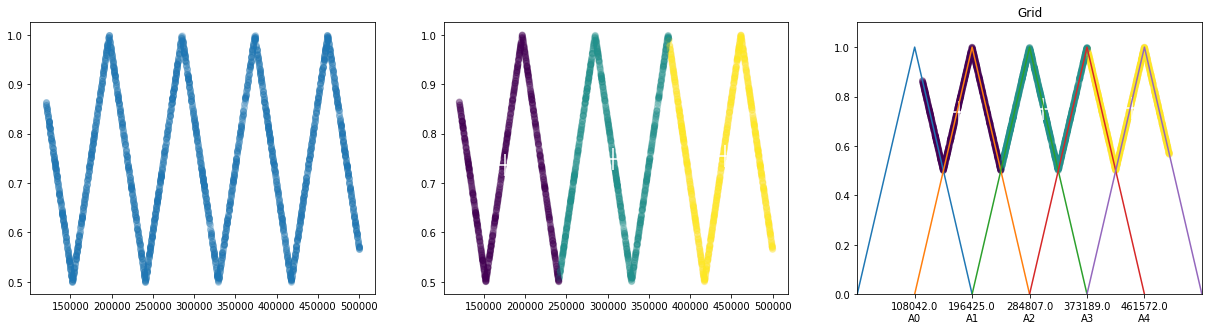

In [7]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# вывод

f, ax = plt.subplots(1, 3, figsize=(21,5))
ax[0].scatter(X[:,0], X[:,1], alpha=.1)
ax[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
ax[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
ax[2].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
ax[2].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
fs.plot(ax[2])
plt.show()